In [198]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.signal import dimpulse, dlti, dlsim, residue, lfilter, freqz
from sympy import symbols, simplify

In [199]:
#Question a
#Method 1
#Define common usage:
N = 100 #100 samples using to gather the data.
n = np.arange(0, N)

In [200]:
#Question a
# Define the symbolic variable
z = symbols('z')

In [201]:
#H(z) equation
#H(z) = 2 /(1 - 1.7z^-1 + 0.72z^-2)(1 - 1.3z^-1 + 0.42z^-2)
H_z = 2 / ((1 - 1.7*z**-1 + 0.72*z**-2) * (1 - 1.3*z**-1 + 0.42*z**-2))

In [202]:
# Simplify the function
H_z_simplified = simplify(H_z)
H_z_simplified

2*z**4/((z**2 - 1.7*z + 0.72)*(z**2 - 1.3*z + 0.42))

In [203]:
# Define numerator and denominator coefficients
numerator = [2]  # Coefficients of the numerator
denominator = np.convolve(
    [1, -1.7, 0.72],  # First denominator polynomial
    [1, -1.3, 0.42]   # Second denominator polynomial
)

In [204]:
# Define the discrete-time transfer function
system = dlti(numerator, denominator)  # Discrete Linear Time-Invariant system

In [205]:
# Compute the impulse response
t, h = dimpulse(system, n=N)  # Impulse response for N samples

In [206]:
# Convert t and h to numpy arrays for plotting
t = np.squeeze(t)  # Time indices
h = np.squeeze(h)  # Impulse response values

In [207]:
# Print the impulse response values
print("Impulse Response h(n):")
print(h)

Impulse Response h(n):
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.00000000e+00 6.00000000e+00 1.13000000e+01 1.71000000e+01
 2.27402000e+01 2.77662000e+01 3.19168100e+01 3.50839500e+01
 3.72681300e+01 3.85393952e+01 3.90068241e+01 3.87965266e+01
 3.80368385e+01 3.68490980e+01 3.53424905e+01 3.36117069e+01
 3.17364493e+01 2.97820720e+01 2.78008579e+01 2.58335938e+01
 2.39112240e+01 2.20564496e+01 2.02851989e+01 1.86079313e+01
 1.70307652e+01 1.55564337e+01 1.41850802e+01 1.29149117e+01
 1.17427288e+01 1.06643489e+01 9.67494124e+00 8.76928822e+00
 7.94198595e+00 7.18759625e+00 6.50075917e+00 5.87627411e+00
 5.30915639e+00 4.79467442e+00 4.32837205e+00 3.90607962e+00
 3.52391637e+00 3.17828673e+00 2.86587202e+00 2.58361904e+00
 2.32872665e+00 2.09863110e+00 1.89099072e+00 1.70367057e+00
 1.53472717e+00 1.38239373e+00 1.24506604e+00 1.12128895e+00
 1.00974379e+00 9.09236488e-01 8.18686561e-01 7.37116924e-01
 6.63644477e-01 5.97471446e-01 5.37877449e-01 4.84212233e-01
 

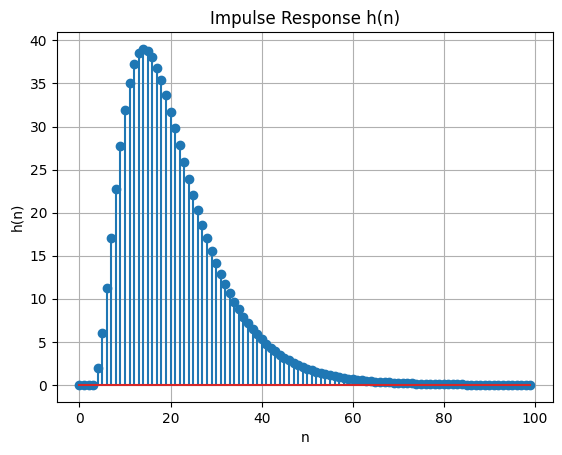

In [208]:
# Plot the impulse response
plt.stem(t, h)
plt.title("Impulse Response h(n)")
plt.xlabel("n")
plt.ylabel("h(n)")
plt.grid()
plt.show()

In [209]:
#Method 1
#Question b
# Define the input signal x(n) as the unit step function
x = np.ones(N)

In [210]:
# Perform the convolution to find the output y(n)
y = np.convolve(x, h, mode='full')[:N]  # Ensure the length is N

In [211]:
# Print the output values
print("Output y(n):")
print(y)

Output y(n):
[  0.           0.           0.           0.           2.
   8.          19.3         36.4         59.1402      86.9064
 118.82321    153.90716    191.17529002 229.7146852  268.72150933
 307.51803592 345.55487437 382.40397239 417.74646286 451.35816973
 483.09461904 512.87669099 540.67754888 566.5111427  590.4223667
 612.47881635 632.76401527 651.37194655 668.40271178 683.95914553
 698.14422571 711.05913741 722.80186618 733.46621504 743.14115628
 751.9104445  759.85243044 767.0400267  773.54078587 779.41705998
 784.72621637 789.52089079 793.84926284 797.75534246 801.27925882
 804.45754555 807.32341757 809.90703661 812.23576326 814.33439436
 816.22538508 817.92905566 819.46378283 820.84617656 822.09124259
 823.21253154 824.22227534 825.13151182 825.95019838 826.68731531
 827.35095978 827.94843123 828.48630868 828.97052091 829.40640995
 829.79878852 830.15199197 830.46992528 830.75610542 831.01369968
 831.24556021 831.45425526 831.64209725 831.81116821 831.9633426
 832.100307

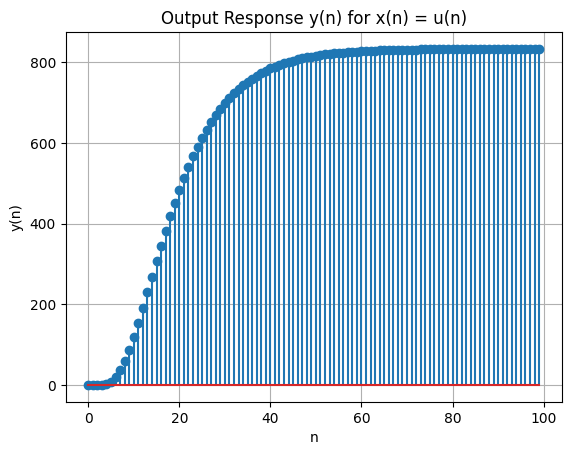

In [212]:

# Plot the output y(n)
plt.stem(t, y)
plt.title("Output Response y(n) for x(n) = u(n)")
plt.xlabel("n")
plt.ylabel("y(n)")
plt.grid()
plt.show()

In [ ]:
#Method 2
r = 2  # Example value for r
p = 0.5  # Example value for p

# Compute y(k) for each n(k)
y = [r * (p ** nk) for nk in n]  # Equivalent summation (assuming r·p^n(k))

In [213]:
#Question d
# Define the input signal x(n) = u(n) - 0.5u(n-2)
x1 = np.ones(N)  # u(n)
x1[2:] -= 0.5  # Subtract 0.5u(n-2)

In [214]:
# Perform the convolution to find the output y(n)
y1 = np.convolve(x1, h, mode='full')[:N]  # Ensure the length is N

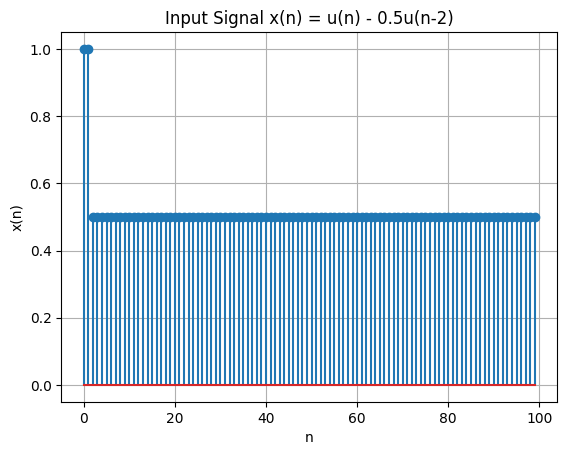

In [215]:
# Plot the input x(n)
plt.stem(n, x1)
plt.title("Input Signal x(n) = u(n) - 0.5u(n-2)")
plt.xlabel("n")
plt.ylabel("x(n)")
plt.grid()


In [216]:
# Print the output values
print("Output y(n):")
print(y)

Output y(n):
[  0.           0.           0.           0.           2.
   8.          19.3         36.4         59.1402      86.9064
 118.82321    153.90716    191.17529002 229.7146852  268.72150933
 307.51803592 345.55487437 382.40397239 417.74646286 451.35816973
 483.09461904 512.87669099 540.67754888 566.5111427  590.4223667
 612.47881635 632.76401527 651.37194655 668.40271178 683.95914553
 698.14422571 711.05913741 722.80186618 733.46621504 743.14115628
 751.9104445  759.85243044 767.0400267  773.54078587 779.41705998
 784.72621637 789.52089079 793.84926284 797.75534246 801.27925882
 804.45754555 807.32341757 809.90703661 812.23576326 814.33439436
 816.22538508 817.92905566 819.46378283 820.84617656 822.09124259
 823.21253154 824.22227534 825.13151182 825.95019838 826.68731531
 827.35095978 827.94843123 828.48630868 828.97052091 829.40640995
 829.79878852 830.15199197 830.46992528 830.75610542 831.01369968
 831.24556021 831.45425526 831.64209725 831.81116821 831.9633426
 832.100307

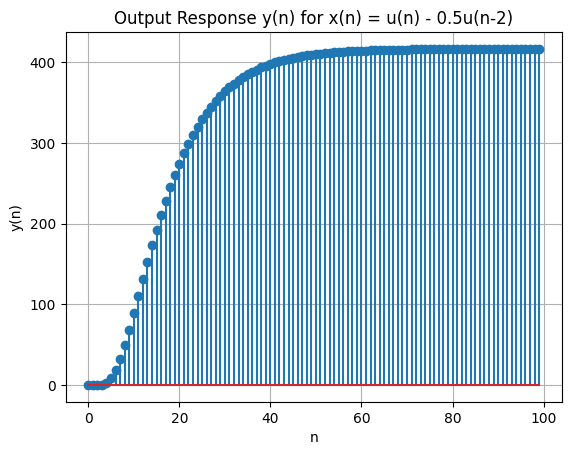

In [217]:
# Plot the output y(n)
plt.figure()
plt.stem(t, y1)
plt.title("Output Response y(n) for x(n) = u(n) - 0.5u(n-2)")
plt.xlabel("n")
plt.ylabel("y(n)")
plt.grid()
plt.show()
